# Analysis of expression correlation relationships
Océane Carpentier

In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw(base_size = 16))

Run this lines before continue :

```bash
dir=/home/ocarpentier/work/result/cypher
cypher-shell -u neo4j -p multireg "MATCH (m:miRNA)-[r:EXPRESSION_CORRELATION]->(g:Gene) RETURN m.name AS RegulatoryGene,g.name AS TargetGene,r.value AS Value ,g.biotype AS Biotype,g.transcript AS NbTranscripts" > $dir/val_cor_biotype_transcript.csv
```

In [2]:
setwd("/home/ocarpentier")
exp_cor <- data.table::fread(file = "work/result/cypher/val_cor_biotype_transcript.csv",header=TRUE, sep=",",data.table=FALSE)

In [3]:
head(exp_cor)

RegulatoryGene TargetGene       Value       Biotype NbTranscripts
1 mirdeep2.7     LOC_000000221661 -0.03687736 lncRNA  1            
2 mirdeep2.7     LOC_000000221641  0.07521847 lncRNA  1            
3 mirdeep2.7     LOC_000000221639 -0.01670264 mRNA    1            
4 mirdeep2.7     LOC_000000221638 -0.05279771 lncRNA  1            
5 mirdeep2.7     LOC_000000221606 -0.02524824 mRNA    1            
6 mirdeep2.7     LOC_000000221589 -0.01690333 lncRNA  1

Correlation distribution :

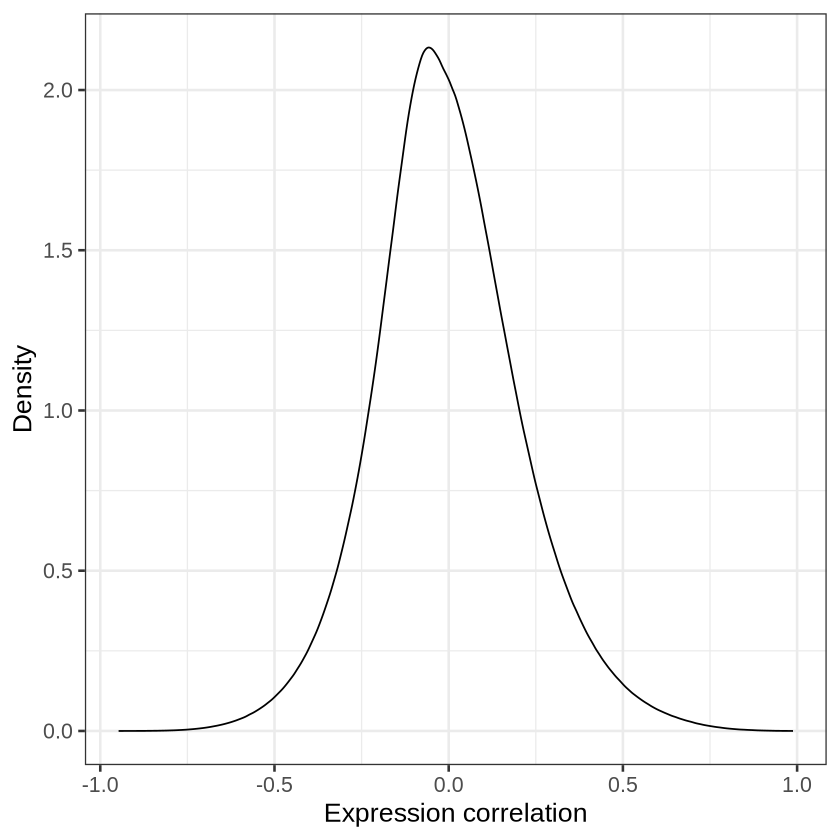

In [10]:
ggplot()+ geom_density(data=exp_cor,aes(x=Value,y = after_stat(density)),alpha=.2) +labs(x = "Expression correlation",
       y = "Density")

Correlation distribution for gene's biotype :

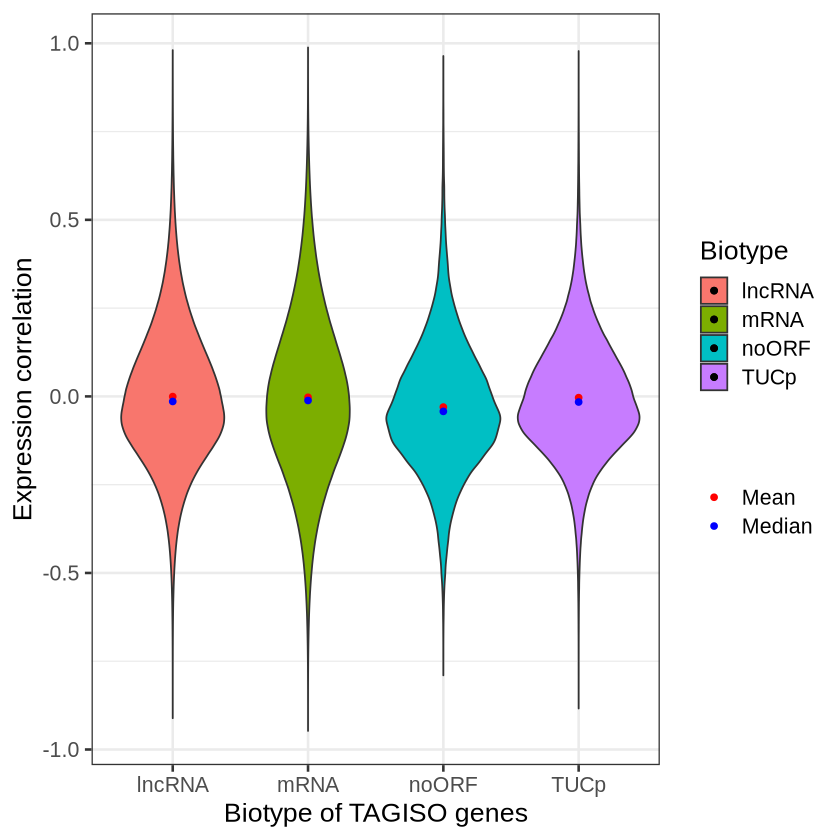

In [5]:
ggplot(exp_cor, aes(x = Biotype, y = Value, fill = Biotype)) +
  geom_violin() +
  labs(x = "Biotype of TAGISO genes",
       y = "Expression correlation") +
stat_summary(fun = "mean",geom = "point", aes(color = "Mean")) +
stat_summary(fun = "median",geom = "point",aes(color = "Median")) +
scale_colour_manual(values = c("red", "blue"), name = "")

Rank of correlation :

In [6]:
exp_cor_sorted = exp_cor[order(-abs(exp_cor$Value)), ]
exp_cor_sorted$Rank = 1:nrow(exp_cor_sorted)
head(exp_cor_sorted)

RegulatoryGene TargetGene       Value     Biotype NbTranscripts Rank
49883614 mirdeep2.5483  LOC_000000113351 0.9881829 mRNA    2             1   
66989225 mirdeep2.4551  LOC_000000064314 0.9870958 mRNA    1             2   
76183377 mirdeep2.6361  LOC_000000068798 0.9810688 mRNA    1             3   
74216009 mirdeep2.4259  LOC_000000064997 0.9806209 lncRNA  2             4   
76183891 mirdeep2.6361  LOC_000000064997 0.9802293 lncRNA  2             5   
9431     mirdeep2.7     LOC_000000097612 0.9780210 TUCp    1             6

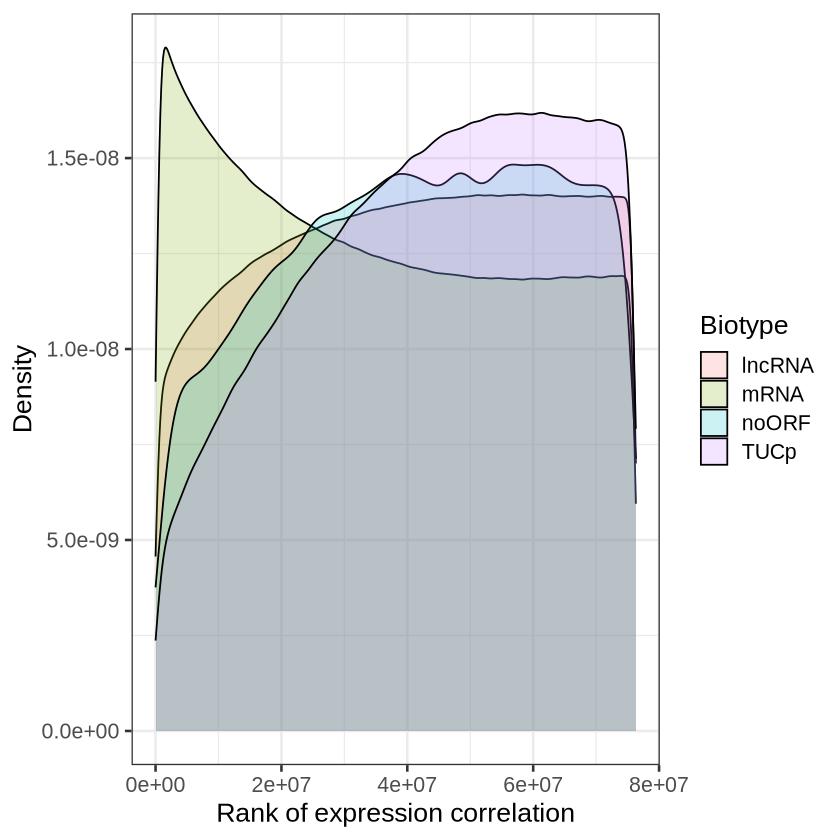

In [9]:
ggplot()+ geom_density(data=exp_cor_sorted,aes(x=Rank,y = after_stat(density), fill=Biotype),alpha=.2)+labs(x = "Rank of expression correlation",
       y = "Density")